In [5]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
subs = pd.read_csv('../input/test.csv', usecols=['item_id'])

(508438,)


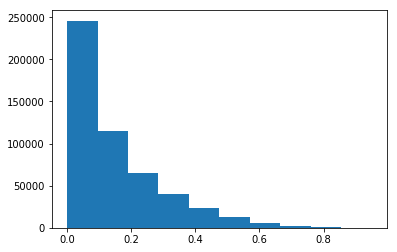

In [7]:
# Blend
'''
blend_path = Path('../subs/blend/')
blend_files = list(blend_path.glob('stack*'))

blend_preds = np.zeros(subs.shape[0])
for f in blend_files:
    blend_pred = pd.read_csv(f, usecols=['deal_probability'])
    blend_preds += blend_pred['deal_probability'].values
blend_preds /= len(blend_files)

print(blend_preds.shape)
plt.hist(blend_preds)

blend_preds = pd.read_csv('../subs/blend/Add_new.csv', usecols=['deal_probability'])
blend_preds = blend_preds.values.flatten()
print(blend_preds.shape)
plt.hist(blend_preds)
'''
blend_preds = pd.read_csv('../subs/blend/best_public_blend.csv', usecols=['deal_probability'])
blend_preds = blend_preds.values.flatten()
print(blend_preds.shape)
plt.hist(blend_preds)
plt.show()

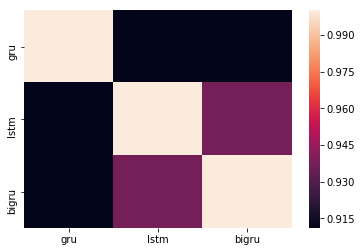

(508438,)


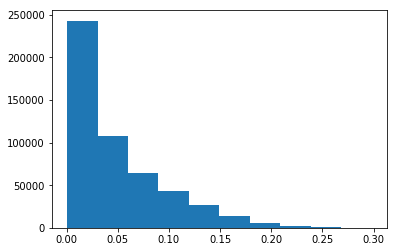

In [10]:
# RNNs
gru = pd.read_csv('../subs/blend/Avito_Shanth_RNN_AVERAGE.csv', usecols=['deal_probability'])
lstm = pd.read_csv('../subs/blend/subs%2FNN_LSTM_2018_0621_1609_22.csv.gz', usecols=['deal_probability'])
bigru = pd.read_csv('../subs/blend/subs%2FNN_GRU_2018_0623_0639_50.csv.gz', usecols=['deal_probability'])

temp = pd.DataFrame()
temp['gru'] = gru['deal_probability'].values
temp['lstm'] = lstm['deal_probability'].values
temp['bigru'] = bigru['deal_probability'].values
corr = temp.corr()
sns.heatmap(corr)
plt.show()

rates = [0.5, 0.25, 0.25]
rnns_preds = gru.values*rates[0] + lstm.values*rates[1] + bigru.values*rates[2]
rnns_preds /= len(rates)
rnns_preds = rnns_preds.flatten()

print(rnns_preds.shape)
plt.hist(rnns_preds)
plt.show()

(508438,)


(array([2.49336e+05, 1.17056e+05, 6.26270e+04, 3.70160e+04, 2.22250e+04,
        1.18910e+04, 5.52900e+03, 1.99800e+03, 5.79000e+02, 1.81000e+02]),
 array([1.0000000e-07, 1.0000009e-01, 2.0000008e-01, 3.0000007e-01,
        4.0000006e-01, 5.0000005e-01, 6.0000004e-01, 7.0000003e-01,
        8.0000002e-01, 9.0000001e-01, 1.0000000e+00]),
 <a list of 10 Patch objects>)

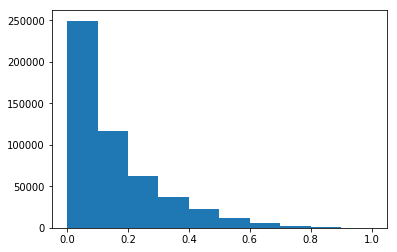

In [11]:
# my LGB
lgb_preds = pd.read_csv('../subs/blend/subs%2Flightgbm_single_ensemble_2018_0625_2332_30_exp.csv.gz', usecols=['deal_probability'])
lgb_preds = lgb_preds.values.flatten()

print(lgb_preds.shape)
plt.hist(lgb_preds)

In [13]:
# submission

rates = [0.65, 0.05 , 0.3]
blend_preds = np.clip(blend_preds, 0.000000001, 1)
rnns_preds = np.clip(rnns_preds, 0.000000001, 1)
lgb_preds = np.clip(lgb_preds, 0.000000001, 1)

preds = np.log(blend_preds)*rates[0] + np.log(rnns_preds)*rates[1] + np.log(lgb_preds)*rates[2]
preds = np.exp(preds)
preds = np.clip(preds, 0, 1)

subs['deal_probability'] = preds.flatten()
subs.to_csv('../subs/blend_subs_.csv.gz', index=False, compression='gzip')

(array([2.46899e+05, 1.14874e+05, 6.42220e+04, 3.92180e+04, 2.30070e+04,
        1.22070e+04, 5.40700e+03, 1.94800e+03, 5.16000e+02, 1.40000e+02]),
 array([3.37436516e-05, 9.04966934e-02, 1.80959643e-01, 2.71422593e-01,
        3.61885543e-01, 4.52348492e-01, 5.42811442e-01, 6.33274392e-01,
        7.23737342e-01, 8.14200291e-01, 9.04663241e-01]),
 <a list of 10 Patch objects>)

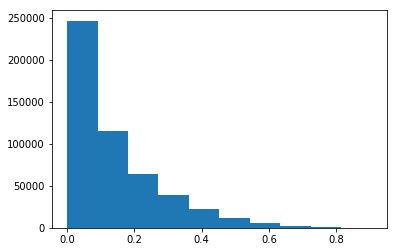

In [14]:
plt.hist(subs['deal_probability'])